In [55]:
import pandas as pd
from tqdm import tqdm
from time import time
import numpy as np
import matplotlib.pyplot as plt

In [65]:
def evolve(tmax,gp,gr,kr,kp,r,p):
    def get_nextt():
        if p!=0 and r!=0:
            t1=-(1/kr)*np.log(np.random.rand())
            t2=-(1/(r*gr))*np.log(np.random.rand())
            t3=-(1/(kp*r))*np.log(np.random.rand())
            t4=-(1/(p*gp))*np.log(np.random.rand())
        elif p==0 and r!=0:
            t1=-(1/kr)*np.log(np.random.rand())
            t2=-(1/(r*gr))*np.log(np.random.rand())
            t3=-(1/(kp*r))*np.log(np.random.rand())
            t4=10000000000000000
        elif r==0 and p!=0:
            t1=-(1/kr)*np.log(np.random.rand())
            t2=10000000000000000000
            t3=10000000000000000000
            t4=-(1/(p*gp))*np.log(np.random.rand())
        else:
            t1=-(1/kr)*np.log(np.random.rand())
            t2=10000000000000000000
            t3=10000000000000000000
            t4=100000000000000000000
        tr1=np.min([t1,t2,t3,t4])
        reaction1=np.argmin([t1,t2,t3,t4])
        return tr1,reaction1
    t=0
    tr,reaction=get_nextt()
    if tr>tmax:
        return r,p
    else:
        while t+tr<tmax:
            t=t+tr
            if reaction==0:
                r=r+1
            elif reaction==1:
                r+=-1
            elif reaction==2:
                p+=1
            else:
                p+=-1
            tr,reaction=get_nextt()
        return r,p

In [70]:
t=0
dt=0.001
s=0

lamb=1
tmax=10
r=0
p=0
data=[[t,r,p]]

kr=100
gr=10
kp=100
gp=1
while t<tmax:
    r,p=evolve(tmax=dt,gp=gp,gr=gr,kr=kr,kp=kp,r=r,p=p)
    (tmax,gp,gr,kr,kp,r,p)
    t+=dt
    data.append([t,r,p])

In [71]:
df=pd.DataFrame(data,columns=['Time','R','Prot'])

In [ ]:
plt.plot(df.Time,df.Prot)

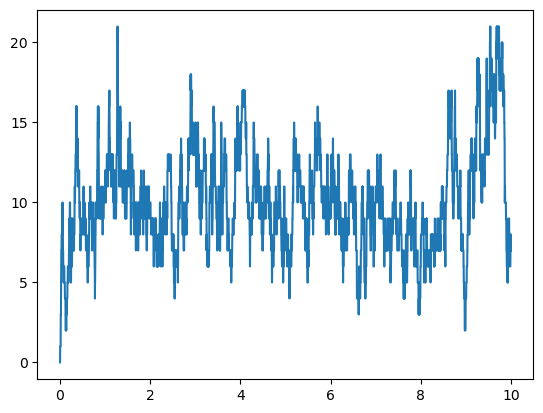

In [73]:
plt.plot(df.Time,df.R)

In [91]:

dt=0.01
tmax=10
kr=100
gr=10
kp=100
gp=1
data=[]
for i in tqdm(range(100)):
    t=0
    r=0
    p=0
    


    while t<tmax:
        r,p=evolve(tmax=dt,gp=gp,gr=gr,kr=kr,kp=kp,r=r,p=p)
        t+=dt
        data.append([i,t,r,p])

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:11<00:00,  1.40it/s]


In [92]:
dfcells=pd.DataFrame(data,columns=['Cell','Time','R','Prot'])

In [94]:
data=[]
for time in dfcells.Time.unique():
    dft= dfcells[dfcells.Time==time]
    mnr=np.mean(dft.R)
    varr=np.var(dft.R)
    mnp=np.mean(dft.Prot)
    varp=np.var(dft.Prot)
    data.append([time,mnr,varr,mnp,varp])
df=pd.DataFrame(data,columns=['Time','MeanR','VarR','MeanP','VarP'])

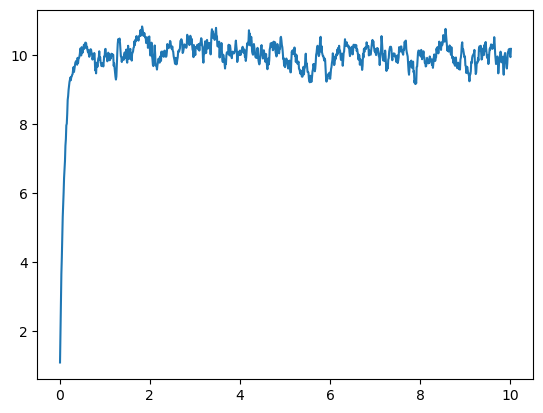

In [96]:
plt.plot(df.Time,df.MeanR)

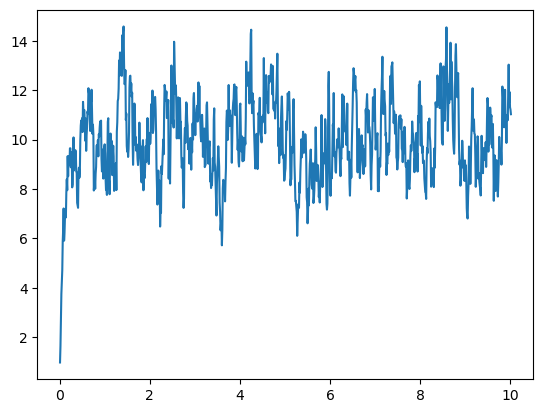

In [97]:
plt.plot(df.Time,df.VarR)

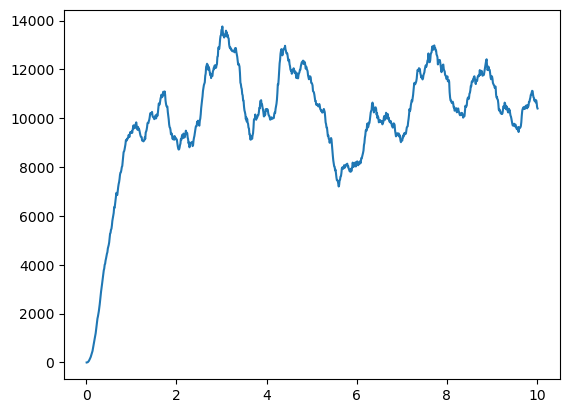

In [98]:
plt.plot(df.Time,df.VarP)

In [101]:
dfcell=dfcells[dfcells.Cell==20]

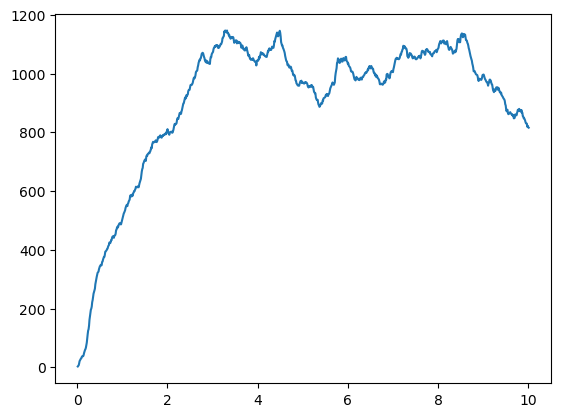

In [103]:
plt.plot(dfcell.Time,dfcell.Prot)

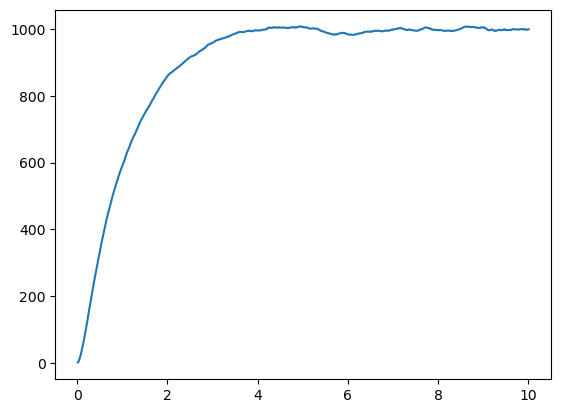

In [100]:
plt.plot(df.Time,df.MeanP)